In [9]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df["job_posted_date"] = pd.to_datetime(df['job_posted_date'])
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [10]:
df_DA_IND = df[(df["job_country"] == "India") & (df["job_title_short"] == "Data Analyst")]

In [11]:
df_DA_IND

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
38,Data Analyst,Data Quality and Governance Analyst 1,India,via Trabajo.org,Full-time,False,India,2023-07-23 13:24:57,False,False,India,None,NaN,NaN,"Jones Lang LaSalle IP, Inc","[sql, python, databricks, power bi, excel, wor...","{'analyst_tools': ['power bi', 'excel', 'word'..."
123,Data Analyst,Data Analytics work from home job/internship a...,Anywhere,via LinkedIn,Part-time,True,India,2023-03-07 13:37:56,False,False,India,None,NaN,NaN,Inoket Solutions Private Limited,"[sql, excel, word, powerpoint, outlook, power bi]","{'analyst_tools': ['excel', 'word', 'powerpoin..."
159,Data Analyst,Data Analyst,"Hyderabad, Telangana, India",via LinkedIn,Contractor,False,India,2023-11-28 13:12:07,False,False,India,None,NaN,NaN,Fusion Plus Solutions Inc,[sql],{'programming': ['sql']}
171,Data Analyst,Data Base work from home job/internship at Mga...,Anywhere,via LinkedIn,Full-time,True,India,2023-01-14 13:11:58,False,False,India,None,NaN,NaN,Mgadz Inc,"[sas, sas, sql]","{'analyst_tools': ['sas'], 'programming': ['sa..."
194,Data Analyst,Data Analyst,India,via BeBee India,Full-time,False,India,2023-06-20 13:11:10,False,False,India,None,NaN,NaN,QuEST Global Services Pte. Ltd,"[python, sql, excel, ms access, powerpoint]","{'analyst_tools': ['excel', 'ms access', 'powe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785517,Data Analyst,Analyst - Data Analytics/SQL (2-9 yrs),"Gurugram, Haryana, India",via BeBee India,Full-time,False,India,2023-10-16 06:10:56,False,False,India,None,NaN,NaN,iimjobs,[power bi],{'analyst_tools': ['power bi']}
785548,Data Analyst,Data Analyst,"Bengaluru, Karnataka, India",via LinkedIn,Full-time,False,India,2023-01-19 06:14:17,False,False,India,None,NaN,NaN,Artech L.L.C.,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785628,Data Analyst,Data Analyst,"Gurugram, Haryana, India",via LinkedIn,Full-time,False,India,2023-01-09 06:08:12,False,False,India,None,NaN,NaN,GUS Global Services India Pvt. Ltd.,"[r, python, sql, sap, power bi, tableau, excel]","{'analyst_tools': ['sap', 'power bi', 'tableau..."
785691,Data Analyst,Business Intelligence Engineer,"Chennai, Tamil Nadu, India",via LinkedIn,Full-time,False,India,2023-01-23 06:12:09,False,False,India,None,NaN,NaN,Mobile Programming LLC,"[sql, python, shell, sql server, tableau, micr...","{'analyst_tools': ['tableau', 'microstrategy']..."


In [12]:
df_plot = df_DA_IND["job_location"].value_counts().head(10).to_frame()

In [13]:
df_plot

,count
job_location,
India,2056
"Hyderabad, Telangana, India",1289
Anywhere,1052
"Bengaluru, Karnataka, India",355
"Maharashtra, India",203
"Mumbai, Maharashtra, India",133
"Pune, Maharashtra, India",119
"Gurugram, Haryana, India",108
"Chennai, Tamil Nadu, India",106


C:\Users\Sushant\AppData\Local\Temp\ipykernel_4128\803177370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="count", y="job_location", palette="dark:b_r", legend=False)


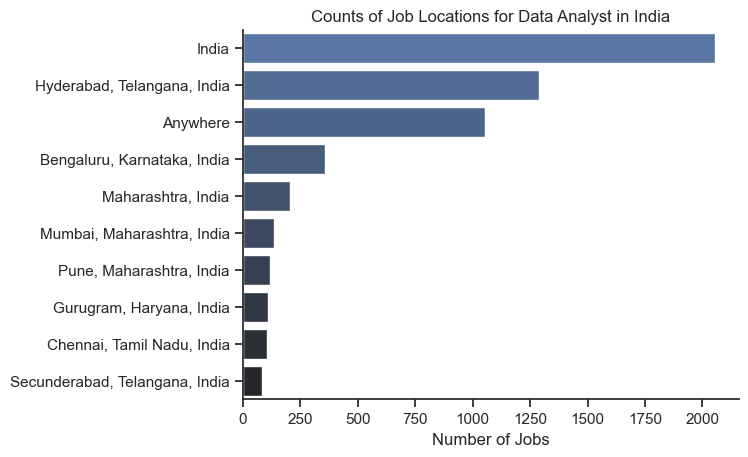

In [19]:
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="job_location", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Job Locations for Data Analyst in India")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()

ValueError: 'labels' must be of length 'x', not 2

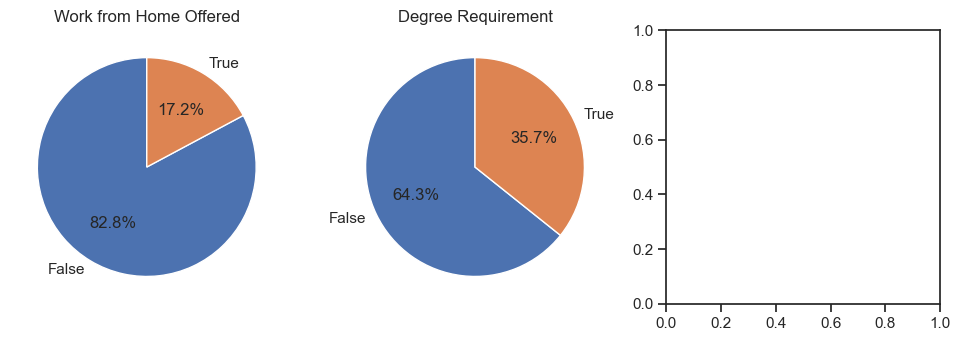

In [24]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_IND[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

C:\Users\Sushant\AppData\Local\Temp\ipykernel_4128\3657009861.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_plot, x="count", y="company_name", palette="dark:b_r", legend=False)


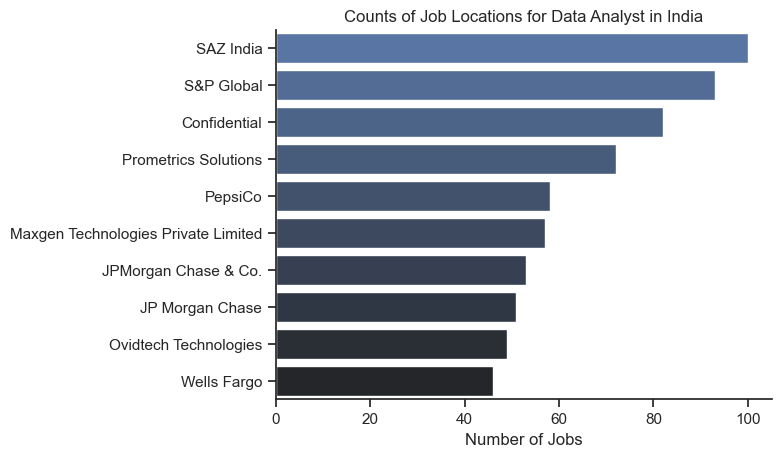

In [25]:
df_plot = df_DA_IND["company_name"].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x="count", y="company_name", palette="dark:b_r", legend=False)
sns.despine()
plt.title("Counts of Job Locations for Data Analyst in India")
plt.xlabel("Number of Jobs")
plt.ylabel("")
plt.show()